In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
import numpy as np

In [2]:
class CGR_SeqAlignment:
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(sequence)-(k-1)):
            d[sequence[i:i+k]] +=1
        for key in list(d):
            if "N" in key:
                del d[key]
        return d
    
    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(kmer_count)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)

        maxx = array_size
        maxy = array_size
        posx = 0
        posy = 0
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx += maxx // 2
                elif char == "C":
                    posy += maxy // 2
                elif char == "G":
                    posx += maxx // 2
                    posy += maxy // 2
                maxx = maxx // 2
                maxy = maxy//2
             #   print(char," posx ",posx," posy ",posy)
            chaos[posy-4][posx-4] = value
            maxx = array_size
            maxy = array_size
            posx = 4
            posy = 4

        return chaos

In [49]:
def CGR_plot(filename,k):
    f = open(filename)
    s = f.read()
    data = "".join(s.split("\n")[1:])
    cgr = CGR_SeqAlignment()
    cgr_kmers = cgr.count_kmers(data,k)
    cgr_prob = cgr.probabilities(cgr_kmers, k)
    chaos_mat = cgr.chaos_game_representation(cgr_prob, k)
    str1 = 'Chaos game representation for', k ,'-mers'
    pylab.title(str1)
    pylab.imshow(chaos_mat, interpolation='nearest',cmap=cm.Reds)
    plt.gca().invert_yaxis()
    file = filename.replace('fasta','png')
    plt.savefig(file)
    pylab.show()
    return chaos_mat

In [50]:
def CGR_prob_dist(chaos1,chaos2):
    dist = sum(sum(np.square(np.array(chaos1) - np.array(chaos2))))
    return dist

In [51]:
import glob
f = glob.glob("F:\DNA_SEQ\*.fasta")

PI_ISL_402131.fasta


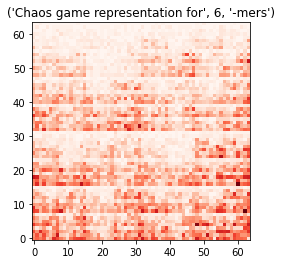

F-430201.fasta


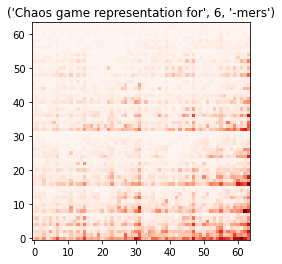

F-514433.fasta


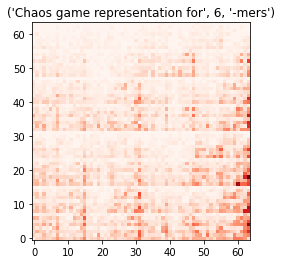

F-530099.fasta


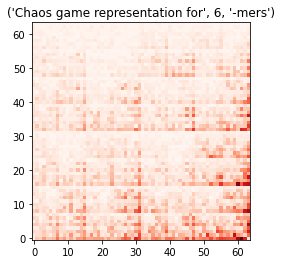

F-530114.fasta


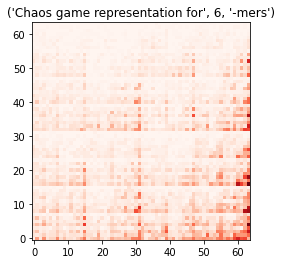

T-026456.fasta


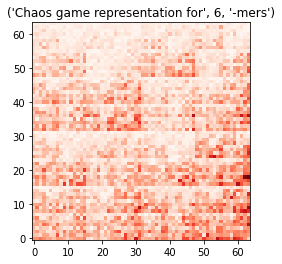

C_004718.fasta


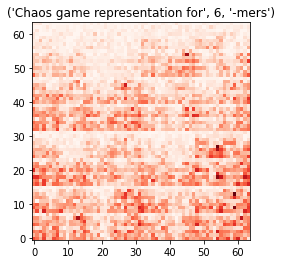

In [52]:
k = 6
chaos_mat = []
for i in range(0,len(f)):
    f1 = f[i]
    print(f1[f1.rindex('\\')+2:len(f1)])
    chaos_mat.append(CGR_plot(f[i],k))

In [53]:
dist_cgr = np.zeros((len(f),len(f)))
for i in range(0,len(f)):
    for j in range(0,len(f)):
        if(i>j):
            dist_cgr[i][j] = round(CGR_prob_dist(chaos_mat[i],chaos_mat[j]),4)
            

In [43]:
dist_cgr

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0197, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0067, 0.0163, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0094, 0.0095, 0.0068, 0.    , 0.    , 0.    , 0.    ],
       [0.0133, 0.0089, 0.0079, 0.0077, 0.    , 0.    , 0.    ],
       [0.0055, 0.0208, 0.0062, 0.0088, 0.0142, 0.    , 0.    ],
       [0.004 , 0.0245, 0.0075, 0.0109, 0.0166, 0.0047, 0.    ]])

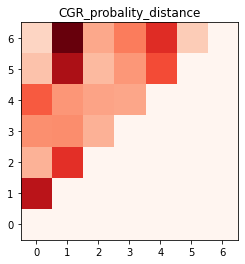

In [44]:
pylab.title("CGR_probality_distance")
pylab.imshow(dist_cgr, interpolation='nearest',cmap =cm.Reds)
plt.gca().invert_yaxis()
pylab.show()